# Importing the grayscale dataset containing and not containing faces

In [1]:
import numpy as np

In [2]:
faces = np.load('grayed_faces.npy')
print(faces.shape)

(35887, 1, 48, 48)


In [3]:
notfaces = np.load('grayed_notfaces.npy')
print(notfaces.shape)

(14596, 1, 48, 48)


In [5]:
X = np.vstack((list(faces),list(notfaces)))
print(X.shape)

(50483, 1, 48, 48)


# Generating labels

In [6]:
N1 = faces.shape[0]
y_faces = np.ones(N1)

In [7]:
N2 = notfaces.shape[0]
y_notfaces = np.zeros(N2)

In [8]:
y = np.append(y_faces, y_notfaces)
print(y.shape)

(50483,)


# Shuffling the data and its labels the same way, then making the train, valid and test sets

In [9]:
N = N1 + N2
indices = list(range(N))
np.random.seed(123) # for making the procedure reproducable
np.random.shuffle(indices)

In [10]:
X = X[indices]
y = y[indices]

In [12]:
train = 0.7
valid = 0.2
# test = 0.1
num_train = int(N*train)
num_valid = int(N*valid)
# num_test = int(N*test)
X_train = X[:num_train]
X_valid = X[num_train:num_train+num_valid]
X_valid = X[num_train+num_valid:] # the remainer is for the test set

# Look at some of the training data

In [13]:
import matplotlib.pyplot as plt

Face:


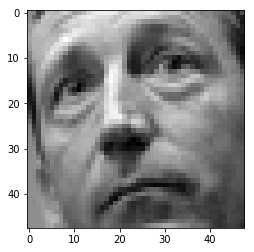

Face:


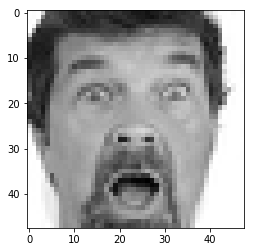

Face:


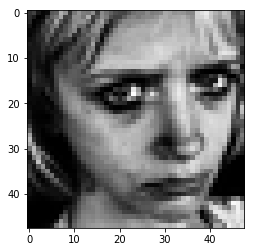

Not a face:


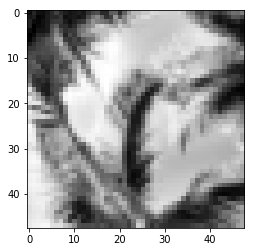

Face:


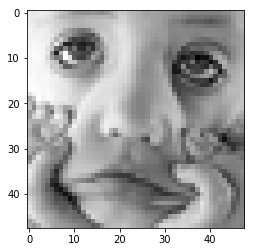

Not a face:


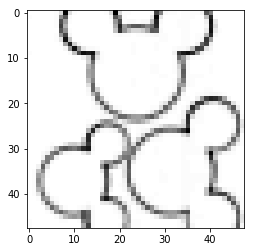

Face:


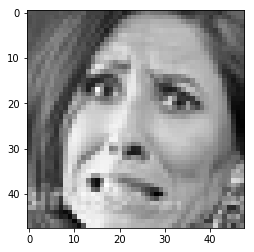

Not a face:


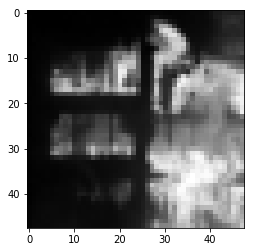

Face:


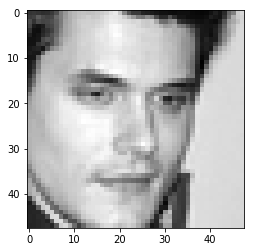

Face:


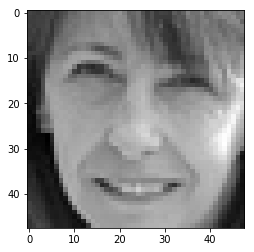

In [18]:
num_show = 10
for i in range(10):
    index = np.random.randint(num_train)
    
    if y[index]==1:
        print('Face:')
    else:
        print('Not a face:')
    
    plt.figure()
    plt.imshow(X_train[index][0], cmap='gray', interpolation='nearest')
    plt.show()

# Hope the number of counterexamples will be enough, but it can be never enough, we should maybe get some little more